In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Excercise 1

In [3]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_2/code_1.stan to exe file /home/AGH-Data-Analytics/lab_2/code_1
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_2/code_1
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -MT src/cmdstan/main.o -MM -E -MG -MP -MF src/cmdstan/main.d src/cmdstan/main.cpp

--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/AGH-Data-Analytics/lab_2/code_1.hpp /home/AGH-Data-Analytics/lab_2/code_1.stan
Warning in '/home/AGH-Data-Analytics/lab_2/code_1.stan', line 7, column 3: Declaration
    of arrays by placing brackets afte

In [4]:
samples = gen_quant.sample(data={'M':10}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Excercise 2

In [9]:

bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_2/code_2.stan to exe file /home/AGH-Data-Analytics/lab_2/code_2
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_2/code_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/AGH-Data-Analytics/lab_2/code_2.hpp /home/AGH-Data-Analytics/lab_2/code_2.stan
Warning in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boos


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in '/home/AGH-Data-Analytics/lab_2/code_2.stan', line 10, column 3 to column 24)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/AGH-Data-Analytics/lab_2/code_2', 'id=1', 'random', 'seed=12663', 'data', 'file=/tmp/tmpny5ry13w/t6uam0a0.json', 'output', 'file=/tmp/tmpny5ry13w/code_2-20230316104426_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpny5ry13w/code_2-20230316104426_1.csv
 console_msgs (if any):
	/tmp/tmpny5ry13w/code_2-20230316104426_0-stdout.txt

In [10]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_2/code_3.stan to exe file /home/AGH-Data-Analytics/lab_2/code_3
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_2/code_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/AGH-Data-Analytics/lab_2/code_3.hpp /home/AGH-Data-Analytics/lab_2/code_3.stan
Warning in '/home/AGH-Data-Analytics/lab_2/code_3.stan', line 3, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boos


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/AGH-Data-Analytics/lab_2/code_3.stan', line 3, column 3 to column 29)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/AGH-Data-Analytics/lab_2/code_3.stan', line 3, column 3 to column 29)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/AGH-Data-Analytics/lab_2/code_3.stan', line 3, column 3 to column 29)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in '/home/AGH-Data-Analytics/lab_2/code_3.stan', line 3, column 3 to column 29)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/AGH-Data-Analytics/lab_2/code_3', 'id=1', 'random', 'seed=1554', 'data', 'file=/tmp/tmpny5ry13w/xbcwus4e.json', 'output', 'file=/tmp/tmpny5ry13w/code_3-20230316104646_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpny5ry13w/code_3-20230316104646_1.csv
 console_msgs (if any):
	/tmp/tmpny5ry13w/code_3-20230316104646_0-stdout.txt

Excercise 3

In [11]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_2/code_4.stan to exe file /home/AGH-Data-Analytics/lab_2/code_4
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_2/code_4
INFO:cmdstanpy:created output directory: /home/AGH-Data-Analytics/lab_2/samples
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |███▍      | 00:00 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |████▍     | 00:00 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |█████▏    | 00:01 Iteration: 3400 / 7000 [ 48%]  (Sampling)


chain 1 |█████▋    | 00:01 Iteration: 3800 / 7000 [ 54%]  (Sampling)


chain 1 |██████    | 00:01 Iteration: 4100 / 7000 [ 58%]  (Sampling)


chain 1 |██████▌   | 00:01 Iteration: 4400 / 7000 [ 62%]  (Sampling)


chain 1 |██████▉   | 00:01 Iteration: 4700 / 7000 [ 67%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 5000 / 7000 [ 71%]  (Sampling)


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/AGH-Data-Analytics/lab_2/samples/code_4-20230316104832_1.csv, /home/AGH-Data-Analytics/lab_2/samples/code_4-20230316104832_2.csv, /home/AGH-Data-Analytics/lab_2/samples/code_4-20230316104832_3.csv, /home/AGH-Data-Analytics/lab_2/samples/code_4-20230316104832_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

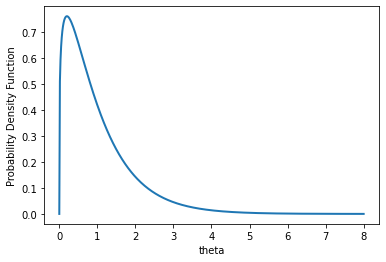

In [12]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

In [13]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_2/code_5.stan to exe file /home/AGH-Data-Analytics/lab_2/code_5
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_2/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |███▎      | 00:00 Iteration: 2100 / 7000 [ 30%]  (Sampling)


chain 1 |████▏     | 00:00 Iteration: 2700 / 7000 [ 38%]  (Sampling)





chain 1 |████▊     | 00:01 Iteration: 3200 / 7000 [ 45%]  (Sampling)


chain 1 |█████▍    | 00:01 Iteration: 3600 / 7000 [ 51%]  (Sampling)


chain 1 |█████▊    | 00:01 Iteration: 3900 / 7000 [ 55%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 4200 / 7000 [ 60%]  (Sampling)


chain 1 |██████▋   | 00:01 Iteration: 4500 / 7000 [ 64%]  (Sampling)


chain 1 |███████   | 00:02 Iteration: 4800 / 7000 [ 68%]  (Sampling)


chain 1 |███████▌  | 00:02 Iteration: 5100 / 7000 [ 72%]  (Sampling)


cha


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/AGH-Data-Analytics/lab_2/samples/code_5-20230316104956_1.csv, /home/AGH-Data-Analytics/lab_2/samples/code_5-20230316104956_2.csv, /home/AGH-Data-Analytics/lab_2/samples/code_5-20230316104956_3.csv, /home/AGH-Data-Analytics/lab_2/samples/code_5-20230316104956_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

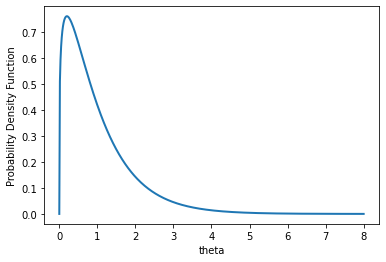

In [14]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Excercise 4

In [17]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 6
L = 6
y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Excercise 5

In [28]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 24072000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target(data=data,seed=seed)
result_3 = model_log_target_ind(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


TypeError: 'CmdStanModel' object is not callable

In [25]:
az.plot_density([result_1,result_2,result_3])
plt.show()

NameError: name 'result_2' is not defined

Excercise 6

In [30]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variable

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_2/code_10.stan to exe file /home/AGH-Data-Analytics/lab_2/code_10
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_2/code_10
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/AGH-Data-Analytics/lab_2/code_10.hpp /home/AGH-Data-Analytics/lab_2/code_10.stan
Warning in '/home/AGH-Data-Analytics/lab_2/code_10.stan', line 6, column 3: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/li

RuntimeError: Error during generate_quantities:
Exception: code_10_model_namespace::code_10_model: N is 6, but must be greater than or equal to 10.000000 (in '/home/AGH-Data-Analytics/lab_2/code_10.stan', line 2, column 3 to column 19)
Exception: code_10_model_namespace::code_10_model: N is 6, but must be greater than or equal to 10.000000 (in '/home/AGH-Data-Analytics/lab_2/code_10.stan', line 2, column 3 to column 19)
Exception: code_10_model_namespace::code_10_model: N is 6, but must be greater than or equal to 10.000000 (in '/home/AGH-Data-Analytics/lab_2/code_10.stan', line 2, column 3 to column 19)
Exception: code_10_model_namespace::code_10_model: N is 6, but must be greater than or equal to 10.000000 (in '/home/AGH-Data-Analytics/lab_2/code_10.stan', line 2, column 3 to column 19)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/AGH-Data-Analytics/lab_2/code_10', 'id=1', 'random', 'seed=96984', 'data', 'file=/tmp/tmpny5ry13w/mw_0wdpe.json', 'output', 'file=/tmp/tmpny5ry13w/code_10-20230316111439_1.csv', 'method=generate_quantities', 'fitted_params=/tmp/tmpny5ry13w/code_7-20230316111039_1.csv']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpny5ry13w/code_10-20230316111439_1.csv
 console_msgs (if any):
	/tmp/tmpny5ry13w/code_10-20230316111439_0-stdout.txt